In [103]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [104]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic


In [105]:
df = pd.read_csv("./Python/Output/LogVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,log,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,Uniform,0.2,0.5,-0.693147,6.524406e-16,-1.675892e-15,7.474085e-16,0.459511,7.042949e+14,-0.095268,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Gaussian,0.2,1.0,0.000000,1.002777e+00,-7.176287e+00,2.638978e+00,0.212594,2.120050e-01,-0.022912,...,0.227709,0.157023,0.098455,0.057053,0.026760,0.016662,0.003534,0.002524,0.000505,0.000000
2,Uniform,0.2,1.0,0.000000,9.715158e-01,-2.005968e+00,1.402995e+00,0.205966,2.120050e-01,-0.020769,...,0.386461,0.402960,0.006499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Gaussian,0.2,2.0,0.693147,1.001682e+00,-4.892572e+00,3.142872e+00,0.101468,1.012975e-01,-0.005789,...,0.224053,0.169296,0.127600,0.077866,0.049734,0.030142,0.012559,0.010047,0.003517,0.002512
4,Uniform,0.2,2.0,0.693147,9.943026e-01,-1.877624e+00,1.576933e+00,0.100720,1.012975e-01,-0.005047,...,0.326967,0.333467,0.300970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [106]:
sorted(df['Noise'].unique())

[1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.2]

In [107]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [108]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=True, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title('log(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

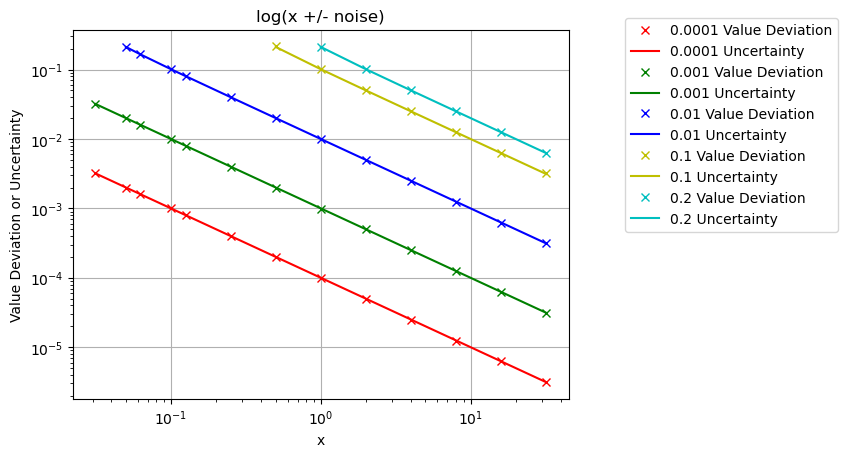

In [109]:
PlotValues()

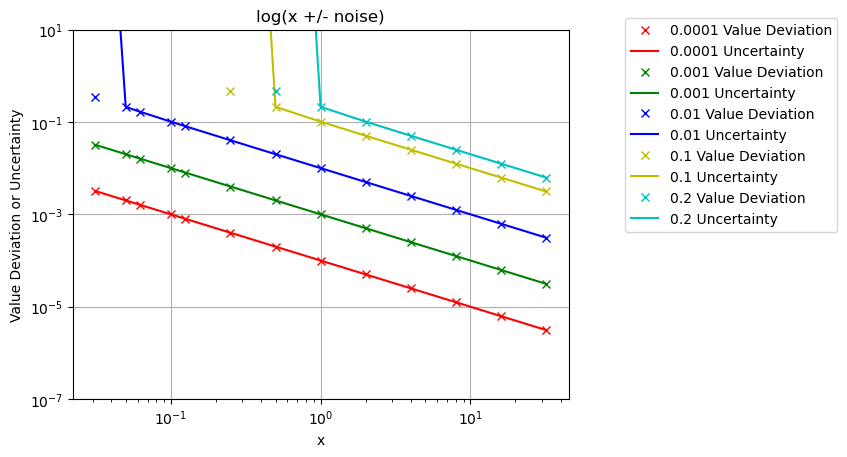

In [110]:
PlotValues(noiseType='Uniform', ylim=[1e-7, 1e1])

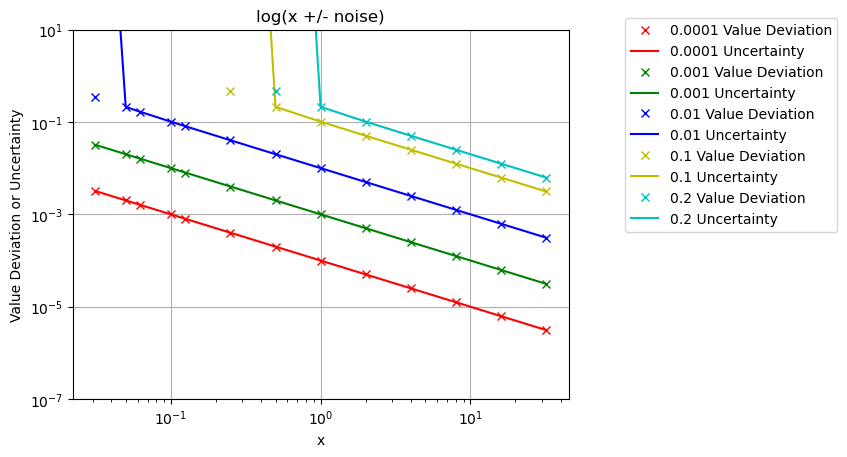

In [111]:
PlotValues(ylim=[1e-7, 1e1], noiseType='Uniform')

In [112]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'], ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\log(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xscale('log')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_xscale('log')
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

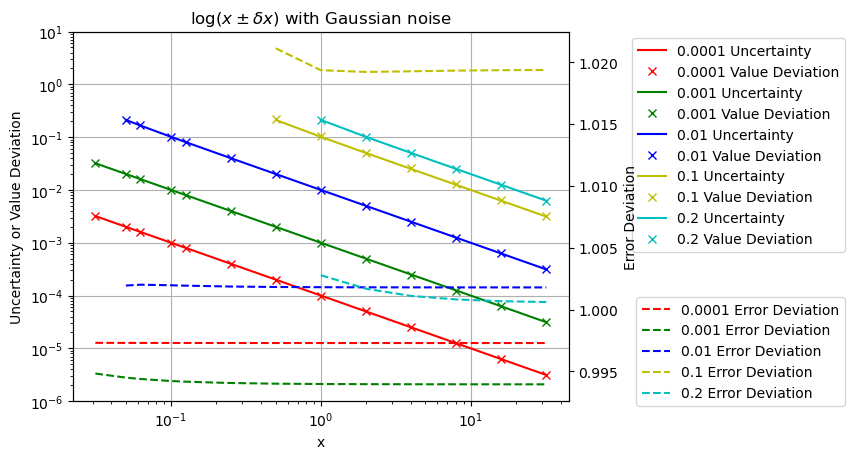

In [113]:
PlotErrorDev()

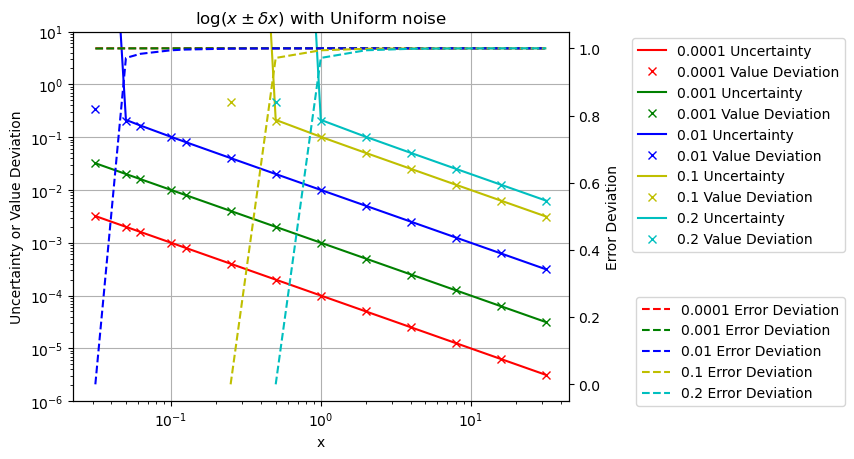

In [114]:
PlotErrorDev('Uniform')

# Mean vs Bias 

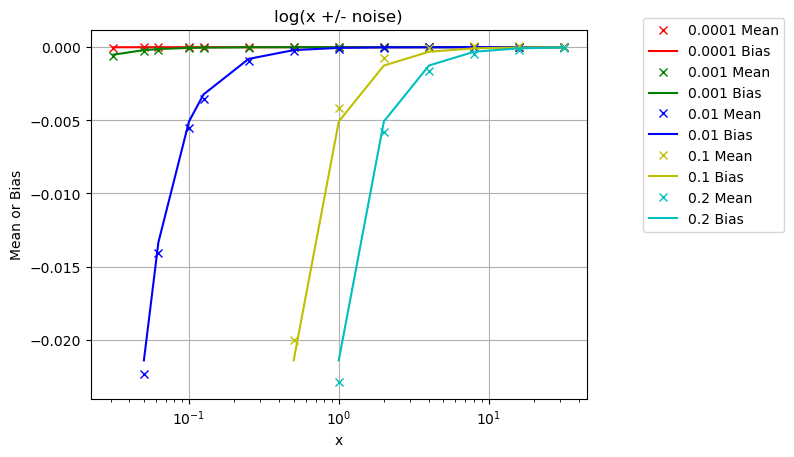

In [115]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

# Error Maximum and Minimum

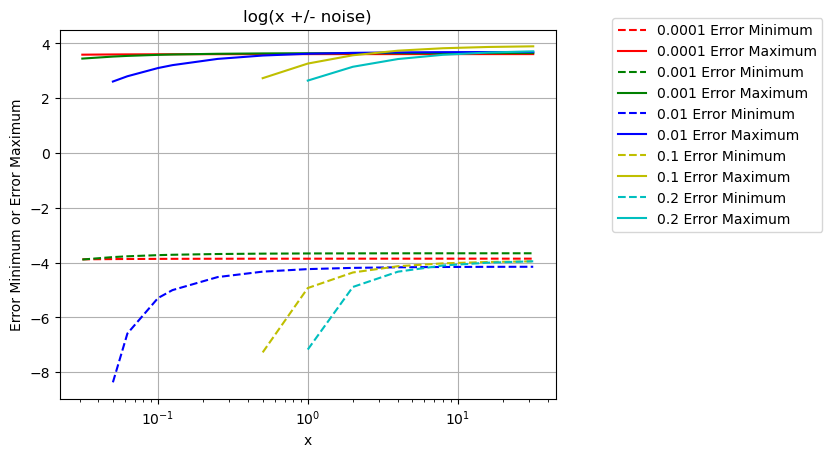

In [116]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# Histogram

In [117]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

,-2.9,-2.7,-2.5,-2.3,-2.1,-1.9,-1.7,-1.5,-1.3,-1.1,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.012622,0.023730,0.034333,0.043421,0.060083,0.078764,0.088357,0.124205,0.151974,0.215086,...,0.227709,0.157023,0.098455,0.057053,0.026760,0.016662,0.003534,0.002524,0.000505,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.005999,0.204980,0.212979,0.222978,0.231977,0.242476,...,0.386461,0.402960,0.006499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.013564,0.016578,0.022104,0.043203,0.056767,0.083894,0.092937,0.129107,0.156737,0.225058,...,0.224053,0.169296,0.127600,0.077866,0.049734,0.030142,0.012559,0.010047,0.003517,0.002512
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.094491,0.245975,0.251475,0.255974,0.261974,...,0.326967,0.333467,0.300970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [118]:
def PlotHisto( sNoiseType=['Gaussian'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


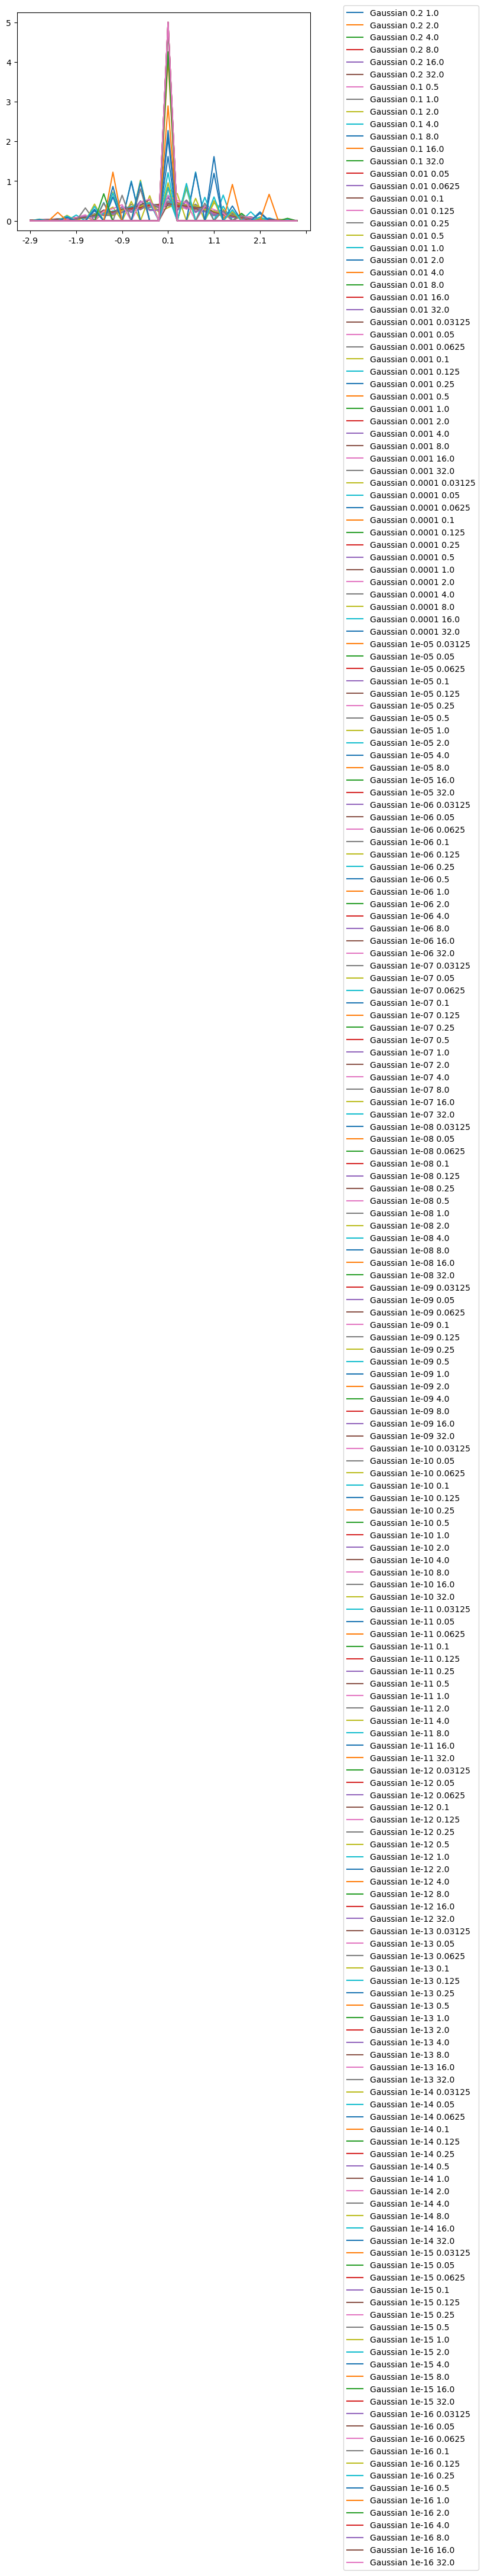

In [119]:
PlotHisto(sNoiseType=['Gaussian'])

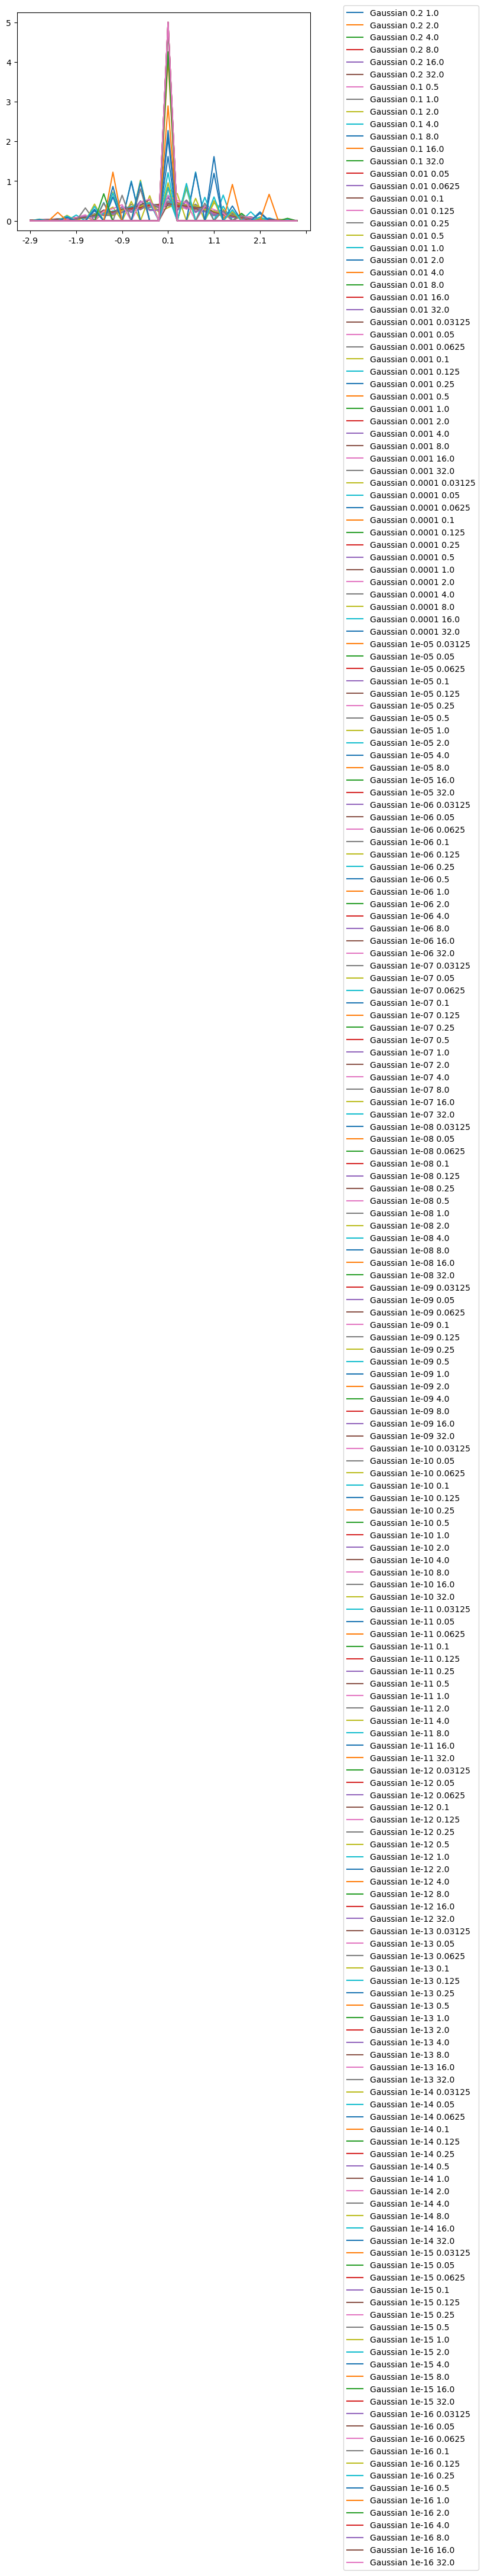

In [120]:
PlotHisto()

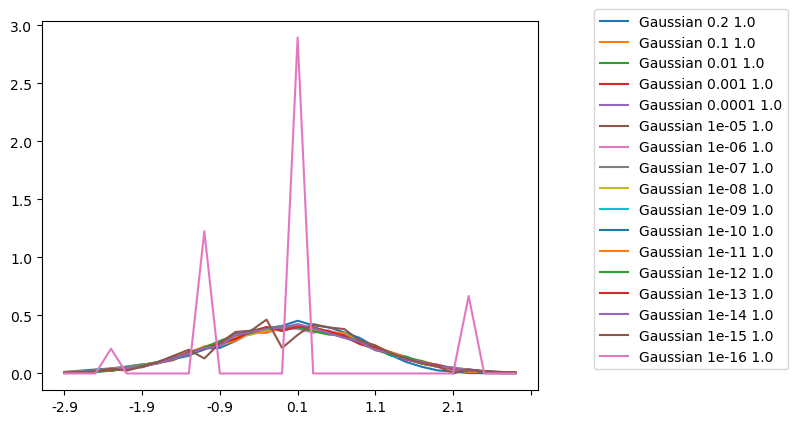

In [121]:
PlotHisto(sX=[1])

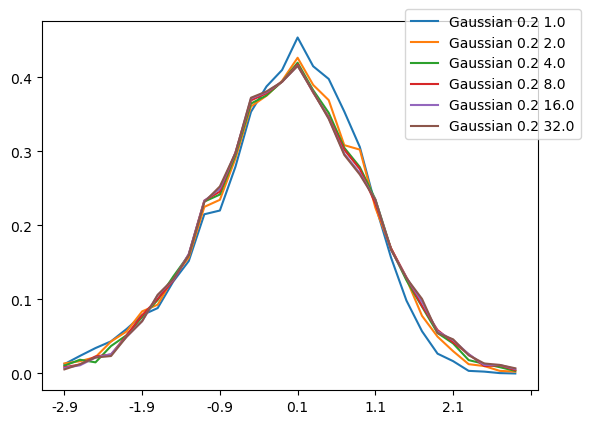

In [122]:
PlotHisto(sNoise=[0.2])